<a href="https://colab.research.google.com/github/Maya7991/gsc_classification/blob/main/pascal_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PASCAL VOC2008

http://host.robots.ox.ac.uk/pascal/VOC/

In [1]:
import torch
import torch.nn as nn
# from torchvision.datasets import CocoDetection
from torchvision.datasets import VOCDetection
from torchvision import transforms

import os
import json
from PIL import Image
import pprint
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
transform = transforms.Compose([transforms.ToTensor()])
dataset = VOCDetection(root='./', year='2012', image_set='train', download=True, transform=transform)

100%|██████████| 2.00G/2.00G [01:27<00:00, 22.8MB/s]


In [3]:
image_tensor, target = dataset[0]
print(image_tensor.shape)       # e.g., torch.Size([3, H, W])

pp = pprint.PrettyPrinter(indent=2)
pp.pprint(target)

torch.Size([3, 442, 500])
{ 'annotation': { 'filename': '2008_000008.jpg',
                  'folder': 'VOC2012',
                  'object': [ { 'bndbox': { 'xmax': '471',
                                            'xmin': '53',
                                            'ymax': '420',
                                            'ymin': '87'},
                                'difficult': '0',
                                'name': 'horse',
                                'occluded': '1',
                                'pose': 'Left',
                                'truncated': '0'},
                              { 'bndbox': { 'xmax': '289',
                                            'xmin': '158',
                                            'ymax': '167',
                                            'ymin': '44'},
                                'difficult': '0',
                                'name': 'person',
                                'occluded': '0',
                   

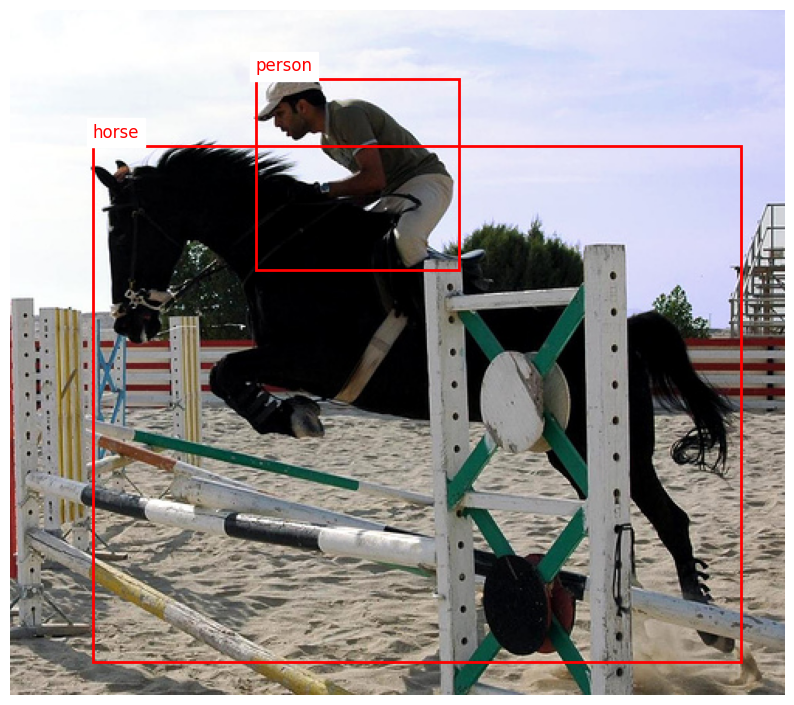

In [4]:
image = image_tensor.permute(1, 2, 0).numpy()  # Convert to HWC for plotting

# Get annotations
objects = target['annotation']['object']
if not isinstance(objects, list):
    objects = [objects]  # Sometimes it's a single dict

# Create the plot
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(image)

# Draw each bounding box
for obj in objects:
    bbox = obj['bndbox']
    xmin = int(bbox['xmin'])
    ymin = int(bbox['ymin'])
    xmax = int(bbox['xmax'])
    ymax = int(bbox['ymax'])
    label = obj['name']

    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                             linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    ax.text(xmin, ymin - 5, label, color='red', fontsize=12, backgroundcolor='white')

plt.axis('off')
plt.show()


# Script to Extract VOC2012 Annotations

New datastructure format:

```
[
    {
        "image_path": "path/to/image.jpg",
        "label": "dog",
        "bbox": [x1, y1, x2, y2]
    },
    ...
]
```

Note: Only one object per image is used even if there are multiple objects in the image.




In [8]:
base_path = '/content/drive/My Drive/Colab Notebooks'

# Directory containing actual JPEG image files
voc_root = os.path.join('./VOCdevkit', 'VOC2012')
jpeg_dir = os.path.join(voc_root, 'JPEGImages')

output_data = []
keyword_set = set()

print("Processing VOC2012 annotations...")

for idx in range(len(dataset)):
    try:
        img, target = dataset[idx]  # target is a dict from VOC XML

        # Get image path
        img_id = dataset.images[idx].split('/')[-1].replace(".xml", "")
        img_path = os.path.join(jpeg_dir, img_id + ".jpg")

        # Parse objects
        objects = target['annotation']['object']
        if not isinstance(objects, list):
            objects = [objects]  # Single object case

        # Choose one object per image
        obj = objects[0]
        label = obj['name']
        bbox = obj['bndbox']
        x1 = int(bbox['xmin'])
        y1 = int(bbox['ymin'])
        x2 = int(bbox['xmax'])
        y2 = int(bbox['ymax'])

        output_data.append({
            "image_path": img_path,
            "label": label,
            "bbox": [x1, y1, x2, y2]
        })
        keyword_set.add(label)

    except Exception as e:
        print(f"Skipping sample {idx} due to error: {e}")
        continue

print(f"Processed {len(output_data)} samples.")
print(f"Unique keywords: {sorted(keyword_set)}")

# Save to JSON
with open(f"{base_path}/voc_keyword_annotations.json", "w") as f:
    json.dump(output_data, f, indent=2)

# Save keyword list
with open(f"{base_path}/voc_keywords.txt", "w") as f:
    for k in sorted(keyword_set):
        f.write(f"{k}\n")

Processing VOC2012 annotations...
Processed 5717 samples.
Unique keywords: ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']
